##Import Library Package

In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans as Kmeans1
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

import geopy
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from datetime import datetime
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings('ignore')


##Read Dataset

In [ ]:
data = pd.read_csv('data.csv')
data.head()

,Umur,Berat Badan,Jenis Kelamin,Alamat,Gejala apa yang dirasakan?,"Jika pasien mengalami demam, apakah demam yang dialami terus menerus sepanjang hari?",Apakah pasien mual/muntah?,Apakah pasien pernah mengalami mimisan?,Berapa suhu badan pasien?,Apakah sudah menerima imunisasi BCG?,...,"Jika iya, karena apa?",Apakah nafsu makan berkurang?,Apakah sering jajan diluar rumah?,Berapa luas rumah pasien?,Berapa jumlah penghuni rumah pasien?,Bagaimana kondisi pembuangan sampah disekitar rumah?,Apakah tersedia air bersih di rumah?,Bagaimana sistem ventilasi di rumah pasien?,Apakah sering menggunakan jamban/toilet?,Apa diagnosa/hasil tes darah pasien?
0,60.0,42,L,Maccini Baji (Gowa),"batuk, demam",Demam Konstan,Muntah,Tidak Mimisan,37.8,Sudah Vaksin BCG,...,-,Nafsu Makan Normal,Jarang Jajan Diluar,54 - 120 m2,7 orang,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi tapi jarang terbuka,Sering Pakai Jamban/Toilet,tbc
1,29.0,39,L,Maccini Baji (Gowa),"demam, diare",Demam Konstan,Muntah,Tidak Mimisan,38.7,Sudah Vaksin BCG,...,-,Nafsu Makan Normal,Sering Jajan Diluar,36 - 54 m2,3 orang,Bersih tanpa ada sampah,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Sering Pakai Jamban/Toilet,tbc
2,18.0,56,P,Maccini Baji (Gowa),"demam, diare",Demam Konstan,Tidak Muntah,Tidak Mimisan,39.0,Sudah Vaksin BCG,...,-,Nafsu Makan Kurang,Sering Jajan Diluar,> 36 m2,2 orang,Ada lalat/nyamuk di sekitar tumpukan sampah,Tersedia air bersih,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,dbd
3,9.0,45,L,Maccini Baji (Gowa),"demam, diare",Demam Konstan,Muntah,Tidak Mimisan,38.0,Sudah Vaksin BCG,...,-,Nafsu Makan Kurang,Jarang Jajan Diluar,54 - 120 m2,6 orang,Ada sampah tapi tidak banyak,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Jarang pakai jamban/toilet,tifoid
4,28.0,42,L,Maccini Baji (Gowa),demam,Demam Konstan,Muntah,Tidak Mimisan,38.2,Sudah Vaksin BCG,...,-,Nafsu Makan Kurang,Sering Jajan Diluar,36 - 54 m2,3 orang,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi tapi jarang terbuka,Sering Pakai Jamban/Toilet,tbc


In [ ]:
# rename column

data = data.copy()
data = data.rename(columns={'Gejala apa yang dirasakan?': 'Gejala', 
                            'Jika pasien mengalami demam, apakah demam yang dialami terus menerus sepanjang hari?': 'Demam Panjang',
                            'Apakah pasien mual/muntah?': 'Mual/Muntah',
                            'Apakah pasien pernah mengalami mimisan?': 'Riwayat Mimisan',
                            'Berapa suhu badan pasien?': 'Suhu Badan',
                            'Apakah sudah menerima imunisasi BCG?': 'Riwayat Vaksin BCG',
                            'Apakah ada orang serumah yang pernah sakit atau diopname?': 'Riwayat Penyakit Orang Serumah',
                            'Jika iya, karena apa?': 'Daftar Penyakit Orang Serumah',
                            'Apakah nafsu makan berkurang?': 'Nafsu Makan',
                            'Apakah sering jajan diluar rumah?': 'Kebiasaan Jajan',
                            'Berapa luas rumah pasien?': 'Luas Rumah',
                            'Berapa jumlah penghuni rumah pasien?': 'Jumlah Penghuni Rumah',
                            'Bagaimana kondisi pembuangan sampah disekitar rumah?': 'Kondisi Pembuangan Sampah',
                            'Apakah tersedia air bersih di rumah?': 'Ketersediaan Air Bersih',
                            'Bagaimana sistem ventilasi di rumah pasien?': 'Sistem Ventilasi Rumah',
                            'Apakah sering menggunakan jamban/toilet?': 'Riwayat Pemakaian Jamban/Toilet',
                            'Apa diagnosa/hasil tes darah pasien?': 'Diagnosa/Tes Darah'})

#Preprocessing


##Feature Selection

In [ ]:
features_data = data[["Umur", 
                      "Alamat", 
                      "Nafsu Makan", 
                      "Kebiasaan Jajan", 
                      "Kondisi Pembuangan Sampah", 
                      "Ketersediaan Air Bersih",
                     "Sistem Ventilasi Rumah",
                     "Riwayat Pemakaian Jamban/Toilet",
                     "Diagnosa/Tes Darah"]].copy()
features_data.iloc[:83]

,Umur,Alamat,Nafsu Makan,Kebiasaan Jajan,Kondisi Pembuangan Sampah,Ketersediaan Air Bersih,Sistem Ventilasi Rumah,Riwayat Pemakaian Jamban/Toilet,Diagnosa/Tes Darah
0,60.0,Maccini Baji (Gowa),Nafsu Makan Normal,Jarang Jajan Diluar,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi tapi jarang terbuka,Sering Pakai Jamban/Toilet,tbc
1,29.0,Maccini Baji (Gowa),Nafsu Makan Normal,Sering Jajan Diluar,Bersih tanpa ada sampah,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Sering Pakai Jamban/Toilet,tbc
2,18.0,Maccini Baji (Gowa),Nafsu Makan Kurang,Sering Jajan Diluar,Ada lalat/nyamuk di sekitar tumpukan sampah,Tersedia air bersih,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,dbd
3,9.0,Maccini Baji (Gowa),Nafsu Makan Kurang,Jarang Jajan Diluar,Ada sampah tapi tidak banyak,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Jarang pakai jamban/toilet,tifoid
4,28.0,Maccini Baji (Gowa),Nafsu Makan Kurang,Sering Jajan Diluar,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi tapi jarang terbuka,Sering Pakai Jamban/Toilet,tbc
...,...,...,...,...,...,...,...,...,...
78,4.0,Bontomanai (Gowa),Nafsu Makan Kurang,Sering Jajan Diluar,Ada sampah tapi tidak banyak,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Sering Pakai Jamban/Toilet,tifoid
79,39.0,Bontomanai (Gowa),Nafsu Makan Kurang,Jarang Jajan Diluar,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,tbc
80,23.0,Bontomanai (Gowa),Nafsu Makan Kurang,Sering Jajan Diluar,Ada sampah tapi tidak banyak,Tersedia air bersih,Ada ventilasi tapi hanya sedikit,Sering Pakai Jamban/Toilet,tifoid
81,30.0,Bontomanai (Gowa),Nafsu Makan Kurang,Jarang Jajan Diluar,Ada sampah dan jarang dibersihkan,Tersedia air bersih,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,dbd


##Check Missing Value

In [ ]:
#check missing value
features_data.isnull().sum()

Umur                               0
Alamat                             0
Nafsu Makan                        0
Kebiasaan Jajan                    0
Kondisi Pembuangan Sampah          0
Ketersediaan Air Bersih            0
Sistem Ventilasi Rumah             0
Riwayat Pemakaian Jamban/Toilet    0
Diagnosa/Tes Darah                 0
dtype: int64

In [ ]:
features_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Umur                             735 non-null    float64
 1   Alamat                           735 non-null    object 
 2   Nafsu Makan                      735 non-null    object 
 3   Kebiasaan Jajan                  735 non-null    object 
 4   Kondisi Pembuangan Sampah        735 non-null    object 
 5   Ketersediaan Air Bersih          735 non-null    object 
 6   Sistem Ventilasi Rumah           735 non-null    object 
 7   Riwayat Pemakaian Jamban/Toilet  735 non-null    object 
 8   Diagnosa/Tes Darah               735 non-null    object 
dtypes: float64(1), object(8)
memory usage: 51.8+ KB


##Multilabel Binarizer

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
mlb = MultiLabelBinarizer()

In [ ]:
features_data['Nafsu Makan']=features_data['Nafsu Makan'].str.split(',\s*')
features_data['Kebiasaan Jajan']=features_data['Kebiasaan Jajan'].str.split(',\s*')
features_data['Kondisi Pembuangan Sampah']=features_data['Kondisi Pembuangan Sampah'].str.split(',\s*')
features_data['Ketersediaan Air Bersih']=features_data['Ketersediaan Air Bersih'].str.split(',\s*')
features_data['Sistem Ventilasi Rumah']=features_data['Sistem Ventilasi Rumah'].str.split(',\s*')
features_data['Riwayat Pemakaian Jamban/Toilet']=features_data['Riwayat Pemakaian Jamban/Toilet'].str.split(',\s*')
features_data['Diagnosa/Tes Darah']=features_data['Diagnosa/Tes Darah'].str.split(',\s*')

In [ ]:
mlb.fit(features_data['Nafsu Makan'])
mlb.fit(features_data['Kebiasaan Jajan'])
mlb.fit(features_data['Kondisi Pembuangan Sampah'])
mlb.fit(features_data['Ketersediaan Air Bersih'])
mlb.fit(features_data['Sistem Ventilasi Rumah'])
mlb.fit(features_data['Riwayat Pemakaian Jamban/Toilet'])
mlb.fit(features_data['Diagnosa/Tes Darah'])

MultiLabelBinarizer()

In [ ]:
mlb.classes_

features_data['Nafsu Makan'].explode().unique()
features_data['Kebiasaan Jajan'].explode().unique()
features_data['Ketersediaan Air Bersih'].explode().unique()
features_data['Kondisi Pembuangan Sampah'].explode().unique()
features_data['Sistem Ventilasi Rumah'].explode().unique()
features_data['Riwayat Pemakaian Jamban/Toilet'].explode().unique()
features_data['Diagnosa/Tes Darah'].explode().unique()

mlb.transform(features_data['Nafsu Makan'])
mlb.transform(features_data['Kebiasaan Jajan'])
mlb.transform(features_data['Ketersediaan Air Bersih'])
mlb.transform(features_data['Kondisi Pembuangan Sampah'])
mlb.transform(features_data['Sistem Ventilasi Rumah'])
mlb.transform(features_data['Riwayat Pemakaian Jamban/Toilet'])
mlb.transform(features_data['Diagnosa/Tes Darah'])

a1 = pd.DataFrame(mlb.fit_transform(features_data['Nafsu Makan']), columns=mlb.classes_)
a2 = pd.DataFrame(mlb.fit_transform(features_data['Kebiasaan Jajan']), columns=mlb.classes_)
a3 = pd.DataFrame(mlb.fit_transform(features_data['Ketersediaan Air Bersih']), columns=mlb.classes_)
a4 = pd.DataFrame(mlb.fit_transform(features_data['Kondisi Pembuangan Sampah']), columns=mlb.classes_)
a5 = pd.DataFrame(mlb.fit_transform(features_data['Sistem Ventilasi Rumah']), columns=mlb.classes_)
a6 = pd.DataFrame(mlb.fit_transform(features_data['Riwayat Pemakaian Jamban/Toilet']), columns=mlb.classes_)
a7 = pd.DataFrame(mlb.fit_transform(features_data['Diagnosa/Tes Darah']), columns=mlb.classes_)

In [ ]:
# concat data column after transformation
data_features=pd.concat([features_data,a1, a2, a3, a4, a5, a6, a7], axis='columns')


In [ ]:
df = data_features.drop(['Nafsu Makan','Nafsu Makan Normal','Jarang Jajan Diluar','Tidak tersedia air bersih',
                         'Ada ventilasi tapi hanya sedikit','Ada sampah dan jarang dibersihkan','Ada sampah tapi tidak banyak','Ada sampah tapi tidak banyak',
                         'Bersih tanpa ada sampah', 'Ada ventilasi tapi jarang terbuka', 'Ada ventilasi tapi selalu tertutup','Jarang pakai jamban/toilet','Kondisi Pembuangan Sampah', 'Kebiasaan Jajan', 'Ketersediaan Air Bersih', 'Sistem Ventilasi Rumah', 'Riwayat Pemakaian Jamban/Toilet', 'Diagnosa/Tes Darah'], axis=1)

In [ ]:
df[:10]

,Umur,Alamat,Nafsu Makan Kurang,Sering Jajan Diluar,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,dbd,tbc,tifoid
0,60.0,Maccini Baji (Gowa),0,0,1,0,0,1,0,1,0
1,29.0,Maccini Baji (Gowa),0,1,1,0,0,1,0,1,0
2,18.0,Maccini Baji (Gowa),1,1,1,1,1,1,1,0,0
3,9.0,Maccini Baji (Gowa),1,0,1,0,0,0,0,0,1
4,28.0,Maccini Baji (Gowa),1,1,1,0,0,1,0,1,0
5,34.0,Maccini Baji (Gowa),0,0,1,0,1,1,0,1,0
6,30.0,Barombong (Gowa),1,1,1,0,1,1,1,0,0
7,3.0,Sapaya (Gowa),1,0,1,0,0,1,0,0,1
8,71.0,Bili Bili (Gowa),1,0,1,0,1,1,0,1,0
9,18.0,Bili Bili (Gowa),1,1,1,0,0,1,1,0,0


##Grouping Data by Address

In [ ]:
##Data TB
data1 = df.copy()
jumlah_tb = data1.loc[(data1['tbc'] == 1)].copy()
jumlah_tb.rename(columns={'Umur': 'Umur1'}, inplace=True)
dict_cat = {}
dict_num = {}

for cat in jumlah_tb.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah_tb.select_dtypes(['int64', 'float64']):
    if((num == 'tbc') or (num == 'dbd') or (num == 'tifoid')):
        continue
    dict_num[num] = ['mean']
    
data_perdesa = jumlah_tb.groupby('Alamat').agg({
    'tbc': 'count',
    **dict_num,
    **dict_cat
})

data_perdesa = data_perdesa[['tbc', 'Umur1']]

In [ ]:
##Data DBD
data1 = df.copy()
jumlah_dbd = data1.loc[(data1['dbd'] == 1)].copy()
jumlah_dbd.rename(columns={'Umur': 'Umur2'}, inplace=True)
dict_cat = {}
dict_num = {}

for cat in jumlah_dbd.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah_dbd.select_dtypes(['int64', 'float64']):
    if((num == 'tbc') or (num == 'dbd') or (num == 'tifoid')):
        continue
    dict_num[num] = ['mean']
    
data_perdesa1 = jumlah_dbd.groupby('Alamat').agg({
    'dbd': 'count',
    **dict_num,
    **dict_cat
})

data_perdesa1 = data_perdesa1[['dbd', 'Umur2']]

In [ ]:
##Data Tifoid
data1 = df.copy()
jumlah_tifoid = data1.loc[(data1['tifoid'] == 1)].copy()
jumlah_tifoid.rename(columns={'Umur': 'Umur3'}, inplace=True)
dict_cat = {}
dict_num = {}

for cat in jumlah_tifoid.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah_tifoid.select_dtypes(['int64', 'float64']):
    if((num == 'tbc') or (num == 'dbd') or (num == 'tifoid')):
        continue
    dict_num[num] = ['count']
    
data_perdesa2 = jumlah_tifoid.groupby('Alamat').agg({
    'tifoid': 'count',
    **dict_num,
    **dict_cat
})

data_perdesa2 = data_perdesa2[['tifoid', 'Umur3']]

In [ ]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Nafsu Makan Kurang'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa3 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa3 = data_perdesa3[['Nafsu Makan Kurang']]

In [ ]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Sering Jajan Diluar'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa4 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa4 = data_perdesa4[['Sering Jajan Diluar']]

In [ ]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Tersedia air bersih'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa5 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa5 = data_perdesa5[['Tersedia air bersih']]

In [ ]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Ada lalat/nyamuk di sekitar tumpukan sampah'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa6 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa6 = data_perdesa6[['Ada lalat/nyamuk di sekitar tumpukan sampah']]

In [ ]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Ada ventilasi disemua ruangan'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):
    dict_num[num] = ['count']
    
data_perdesa7 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa7 = data_perdesa7[['Ada ventilasi disemua ruangan']]

In [ ]:
#Data Etc
data1 = df.copy()
jumlah = data1.loc[(data1['Sering Pakai Jamban/Toilet'] == 1)].copy()
dict_cat = {}
dict_num = {}

for cat in jumlah.select_dtypes(['object']) :
    if (cat == 'Alamat'):
        continue
    dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in jumlah.select_dtypes(['int64', 'float64']):

    dict_num[num] = ['count']
    
data_perdesa8 = jumlah.groupby('Alamat').agg({
    **dict_num,
    **dict_cat
})

data_perdesa8 = data_perdesa8[['Sering Pakai Jamban/Toilet']]

In [ ]:
##merge 4 column data
merge_data = pd.concat([data_perdesa, 
                          data_perdesa1, 
                          data_perdesa2,
                          data_perdesa3,
                          data_perdesa4, 
                          data_perdesa5,
                          data_perdesa6,
                          data_perdesa7, 
                          data_perdesa8], axis='columns')

#remove nan data
merge_data  = merge_data .replace(np.NaN, 0)

In [ ]:
##fix named columns
merge_data.columns = merge_data.columns.map(''.join).str.strip('|')
merge_data.columns = [
    c.replace('mean', '').replace('count', '') for c in merge_data.columns
]


In [ ]:
#evarage column umur
merge_data['Umur'] = (merge_data['Umur1']+merge_data['Umur2']+merge_data['Umur3'])/3
merge_data = merge_data.drop(['Umur1', 'Umur2', 'Umur3'], axis=1)

#convert to float columns int
merge_data['Sering Pakai Jamban/Toilet'] = merge_data['Sering Pakai Jamban/Toilet'].astype(float)

In [ ]:
merge_data.index.name = None

In [ ]:
merge_data.shape
merge_data[:10]

,tbc,dbd,tifoid,Nafsu Makan Kurang,Sering Jajan Diluar,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,Umur
Bili Bili (Gowa),11.0,9.0,14.0,26.0,19.0,33.0,1.0,18.0,31.0,28.659933
Binangae (Gowa),1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,9.666667
Bonto Bontoa (Gowa),2.0,10.0,3.0,14.0,13.0,15.0,2.0,6.0,14.0,27.333333
Bonto-Bonto (Gowa),1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,6.000000
Bontomanai (Gowa),36.0,29.0,54.0,103.0,73.0,119.0,5.0,63.0,115.0,37.869413
Bontomarannu (Gowa),5.0,1.0,2.0,5.0,6.0,8.0,0.0,5.0,8.0,13.933333
Bontonompo (Gowa),2.0,0.0,1.0,1.0,1.0,3.0,0.0,1.0,3.0,16.500000
Bontoramba (Gowa),4.0,8.0,8.0,17.0,16.0,20.0,1.0,14.0,18.0,21.625000
Bontotangnga (Gowa),1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,19.333333
Borong (Gowa),1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,15.000000


In [ ]:
#COUNT LOGITUDE AND LATITUDE FOR ALL DESA
alamat = []
for i in merge_data.index:
  splitted = i.split(' (')
  alamat.append(splitted[0])
geolocator = Nominatim(user_agent="tes")
coord = []
for i in range(0, len(alamat)):
  loc = alamat[i]
  location = geolocator.geocode(loc, timeout=None)
  if location != None:
    m = 0.0025
    coord.append([[location.latitude, location.longitude],
                  [location.latitude + m, location.longitude + m],
                  [location.latitude + m, location.longitude - m],
                  [location.latitude - m, location.longitude + m],
                  [location.latitude - m, location.longitude - m]])
    print(loc)
coord1 = [i[0] for i in coord]
coord2 = [i[1] for i in coord]
coord3 = [i[2] for i in coord]
coord4 = [i[3] for i in coord]
coord5 = [i[4] for i in coord]

Bili Bili
Binangae
Bonto Bontoa
Bonto-Bonto
Bontomanai
Bontomarannu
Bontonompo
Bontoramba
Bontotangnga
Borong
Borongloe
Gowa
Jalan Bangkala, Manggala
Jalan Danau Mawang No. 4
Jalan Poros Malino
Maccini Baji
Mata Allo
Nirannuang
Pakatto
Palangga
Pattalassang
Romang Lompoa
Romangloe
Samata
Sokkolia
Somba Opu
Barombong
Borong Sapiri
Kampung Beru
Lempangang
Moncongloe
Sungguminasa
Tangkebajeng
Buntu Alang
Lauwa
Pallantikang
Panambungan
Romang Polong
Sapaya


## **ALGORITHM**

Kmeans from Scratch

In [ ]:
class KMeans:
    def __init__(
            self,
            n_cluster: int,
            init_pp: bool = True,
            max_iter: int = 300,
            tolerance: float = 1e-4,
            seed: int = None):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.tolerance = tolerance
        self.init_pp = init_pp
        self.seed = seed
        self.centroid = None
        self.SSE = None

    def fit(self, data: np.ndarray):
        self.centroid = self._init_centroid(data)
        for _ in range(self.max_iter):
            distance = self._calc_distance(data)
            cluster = self._assign_cluster(distance)
            new_centroid = self._update_centroid(data, cluster)
            diff = np.abs(self.centroid - new_centroid).mean()
            self.centroid = new_centroid

            if diff <= self.tolerance:
                break

        self.SSE = calc_sse(self.centroid, cluster, data)

    def predict(self, data: np.ndarray):
        distance = self._calc_distance(data)
        # print(distance.shape)
        cluster = self._assign_cluster(distance)
        # print(cluster.shape)
        return cluster

    def _init_centroid(self, data: np.ndarray):
        if self.init_pp:
            np.random.seed(self.seed)
            centroid = [int(np.random.uniform()*len(data))]
            for _ in range(1, self.n_cluster):
                dist = []
                dist = [min([np.inner(data[c]-x, data[c]-x) for c in centroid])
                        for i, x in enumerate(data)]
                dist = np.array(dist)
                dist = dist / dist.sum()
                cumdist = np.cumsum(dist)

                prob = np.random.rand()
                for i, c in enumerate(cumdist):
                    if prob > c and i not in centroid:
                        centroid.append(i)
                        break
            centroid = np.array([data[c] for c in centroid])
        else:
            np.random.seed(self.seed)
            idx = np.random.choice(range(len(data)), size=(self.n_cluster))
            centroid = data[idx]
        # print(centroid)
        return centroid

    def _calc_distance(self, data: np.ndarray):
        distances = []
        for c in self.centroid:
            distance = np.sum((data - c) * (data - c), axis=1)
            distances.append(distance)

        distances = np.array(distances)
        distances = distances.T
        return distances

    def _assign_cluster(self, distance: np.ndarray):
        cluster = np.argmin(distance, axis=1)
        return cluster

    def _update_centroid(self, data: np.ndarray, cluster: np.ndarray):
        centroids = []
        for i in range(self.n_cluster):
            idx = np.where(cluster == i)
            centroid = np.mean(data[idx], axis=0)
            centroids.append(centroid)
        centroids = np.array(centroids)
        return centroids

SSE

In [ ]:
def calc_sse(centroids: np.ndarray, labels: np.ndarray, data: np.ndarray):
    distances = 0
    for i, c in enumerate(centroids):
        idx = np.where(labels == i)
        dist = np.sum((data[idx] - c)**2)
        distances += dist
    return distances

Quantization Error

In [ ]:
def quantization_error(centroids: np.ndarray, labels: np.ndarray, data: np.ndarray) -> float:
    error = 0.0
    for i, c in enumerate(centroids):
        idx = np.where(labels == i)
        dist = np.linalg.norm(data[idx] - c)
        dist /= len(idx)
        error += dist
    error /= len(centroids)
    return error

Particle for PSO

In [ ]:
class Particle:
    def __init__(self,
                 n_cluster: int,
                 data: np.ndarray,
                 use_kmeans: bool = False,
                 w: float = 0.9,
                 c1: float = 0.5,
                 c2: float = 0.3):
        index = np.random.choice(list(range(len(data))), n_cluster)
        self.centroids = data[index].copy()
        if use_kmeans:
            kmeans = KMeans(n_cluster=n_cluster, init_pp=False)
            kmeans.fit(data)
            self.centroids = kmeans.centroid.copy()
        self.best_position = self.centroids.copy()
        self.best_score = quantization_error(self.centroids, self._predict(data), data)
        self.best_sse = calc_sse(self.centroids, self._predict(data), data)
        self.velocity = np.zeros_like(self.centroids)
        self._w = w
        self._c1 = c1
        self._c2 = c2
        self.r1 = 0  # tambahkana variabel r1
        self.r2 = 0  # tambahkan variabel r2

    def update(self, gbest_position: np.ndarray, data: np.ndarray):
        self._update_velocity(gbest_position)
        self._update_centroids(data)

    def _update_velocity(self, gbest_position: np.ndarray):
        v_old = self._w * self.velocity
        self.r1 = np.random.random()
        self.r2 = np.random.random()
        cognitive_component = self._c1 * self.r1 * (self.best_position - self.centroids)
        social_component = self._c2 * self.r2 * (gbest_position - self.centroids)
        self.velocity = v_old + cognitive_component + social_component

    def _update_centroids(self, data: np.ndarray):
        self.centroids = self.centroids + self.velocity
        new_score = quantization_error(self.centroids, self._predict(data), data)
        sse = calc_sse(self.centroids, self._predict(data), data)
        self.best_sse = min(sse, self.best_sse)
        if new_score < self.best_score:
            self.best_score = new_score
            self.best_position = self.centroids.copy()

    def _predict(self, data: np.ndarray) -> np.ndarray:
        distance = self._calc_distance(data)
        cluster = self._assign_cluster(distance)
        return cluster

    def _calc_distance(self, data: np.ndarray) -> np.ndarray:
        distances = []
        for c in self.centroids:
            distance = np.sum((data - c) * (data - c), axis=1)
            distances.append(distance)

        distances = np.array(distances)
        distances = np.transpose(distances)
        return distances

    def _assign_cluster(self, distance: np.ndarray) -> np.ndarray:
        cluster = np.argmin(distance, axis=1)
        return cluster
    
    def print_velocity(self):
        print(self.velocity)

    def print_r1(self):
        print(self.r1)
    
    def print_r2(self):
        print(self.r2)
        
    def print_best_position(self):
        print(self.best_position)

PSO from Scratch

In [ ]:
class ParticleSwarmOptimizedClustering:
    def __init__(self,
                 n_cluster: int,
                 n_particles: int,
                 data: np.ndarray,
                 hybrid: bool = True,
                 max_iter: int = 100,
                 print_debug: int = 10):
        self.n_cluster = n_cluster
        self.n_particles = n_particles
        self.data = data
        self.max_iter = max_iter
        self.particles = []
        self.hybrid = hybrid

        self.print_debug = print_debug
        self.gbest_score = np.inf
        self.gbest_centroids = None
        self.gbest_position = None
        self.gbest_sse = np.inf
        self._init_particles()

    def _init_particles(self):
        for i in range(self.n_particles):
            particle = None
            if i == 0 and self.hybrid:
                particle = Particle(self.n_cluster, self.data, use_kmeans=True)
            else:
                particle = Particle(self.n_cluster, self.data, use_kmeans=False)
            if particle.best_score < self.gbest_score:
                self.gbest_centroids = particle.centroids.copy()
                self.gbest_score = particle.best_score
            self.particles.append(particle)
            self.gbest_sse = min(particle.best_sse, self.gbest_sse)

    def run(self):
        print('Initial global best score', self.gbest_score)
        history = []
        for i in range(self.max_iter):
            for particle in self.particles:
                particle.update(self.gbest_centroids, self.data)
                # print(i, particle.best_score, self.gbest_score)
            for particle in self.particles:
                if particle.best_score < self.gbest_score:
                    self.gbest_centroids = particle.centroids.copy()
                    self.gbest_score = particle.best_score
            history.append(self.gbest_score)
            if i % self.print_debug == 0:
                print('Iteration {:04d}/{:04d} current gbest score {:.18f}'.format(
                    i + 1, self.max_iter, self.gbest_score))
        print('Finish with gbest score {:.18f}'.format(self.gbest_score))
        return history
    

Perhitungan PSO terdiri atas nilai posisi partikel X(t+1) yang diupdate berdasarkan nilai kecepatan partikel U(t+1) dan memiliki persamaan :
U(t+1) = wU(t) + c1r1(Pbest-X(t)) + c2r2(Gbest-X(t))

Dimana w adalah bobot inersia dengan nilai 0,9 - 1,2;
Pbest adalah posisi partikel S yang terbaik dari waktu awal sampai waktu skrg;
Gbest adalah global best partikel yg dipilih dari Pbest yang memiliki posisi terbaik;
r1 dan r2 adalah bilangan acak 0-1;
c1=c2 adalah learning rates yang diperoleh juga secara random

##*Data Normalization*

In [ ]:
test_data = merge_data.copy()
index_awal = test_data.index

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(test_data)

# Create a new DataFrame with the normalized features
X_normalized_df = pd.DataFrame(X_normalized, columns=test_data.columns)
X_normalized_df.index = index_awal
X_normalized_df.index.name = None
X_normalized_df[:10]

,tbc,dbd,tifoid,Nafsu Makan Kurang,Sering Jajan Diluar,Tersedia air bersih,Ada lalat/nyamuk di sekitar tumpukan sampah,Ada ventilasi disemua ruangan,Sering Pakai Jamban/Toilet,Umur
Bili Bili (Gowa),0.275,0.169811,0.259259,0.228070,0.202128,0.239130,0.166667,0.246575,0.227273,0.754650
Binangae (Gowa),0.025,0.000000,0.000000,0.000000,0.010638,0.007246,0.000000,0.013699,0.000000,0.248650
Bonto Bontoa (Gowa),0.050,0.188679,0.055556,0.122807,0.138298,0.108696,0.333333,0.082192,0.098485,0.719308
Bonto-Bonto (Gowa),0.025,0.000000,0.000000,0.000000,0.010638,0.007246,0.000000,0.000000,0.000000,0.150966
Bontomanai (Gowa),0.900,0.547170,1.000000,0.903509,0.776596,0.862319,0.833333,0.863014,0.863636,1.000000
Bontomarannu (Gowa),0.125,0.018868,0.037037,0.043860,0.063830,0.057971,0.000000,0.068493,0.053030,0.362318
Bontonompo (Gowa),0.050,0.000000,0.018519,0.008772,0.010638,0.021739,0.000000,0.013699,0.015152,0.430697
Bontoramba (Gowa),0.100,0.150943,0.148148,0.149123,0.170213,0.144928,0.166667,0.191781,0.128788,0.567232
Bontotangnga (Gowa),0.025,0.000000,0.000000,0.008772,0.000000,0.007246,0.000000,0.000000,0.000000,0.506180
Borong (Gowa),0.025,0.000000,0.000000,0.008772,0.000000,0.007246,0.000000,0.000000,0.000000,0.390735


#**CLUSTER1**

In [ ]:
data_cluster1 = merge_data[['tbc','Umur']] 

# Standardize data
scaler = MinMaxScaler()
Num_features = data_cluster1.select_dtypes(include=['int64', 'float64']).columns
scaler.fit(data_cluster1[Num_features])
cluster1 = scaler.transform(data_cluster1[Num_features])

###Elbow Method

In [ ]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(cluster1)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(cluster1, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 11),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
print(df)

    K       sse  silhouette
0   2  2.035014    0.631592
1   3  1.026626    0.504868
2   4  0.567322    0.515763
3   5  0.343127    0.534782
4   6  0.252128    0.575916
5   7  0.187420    0.561436
6   8  0.129464    0.569742
7   9  0.098788    0.579502
8  10  0.070949    0.561733


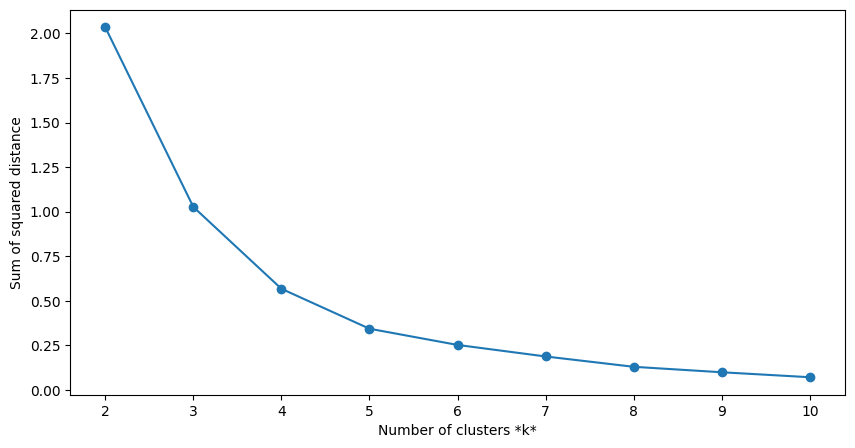

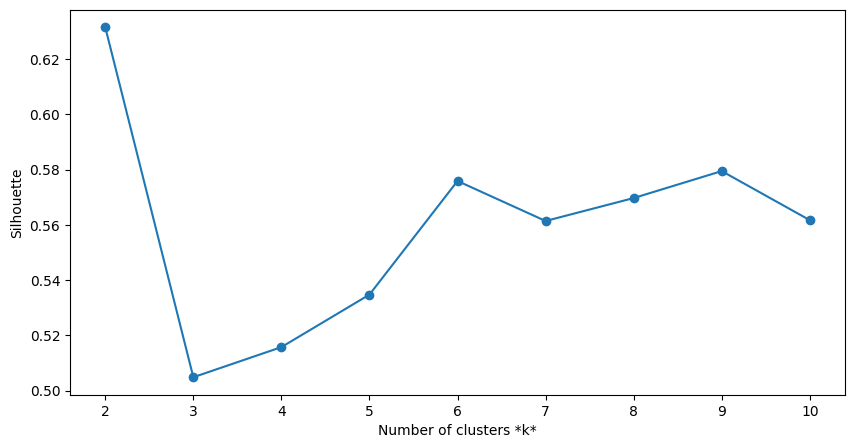

In [ ]:
K = list(range(2,11))
# Plot sse against k
plt.figure(figsize=(10, 5))
plt.plot(K, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# Plot silhouette against k
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette');

### **K-Means**

In [ ]:
kmeans1 = KMeans(n_cluster=3)
kmeans1.fit(cluster1)

####Jarak Terdekat Centroid


In [ ]:
data = cluster1.copy()

# Set the number of clusters
num_clusters = 3

# Initialize KMeans object
Kmeans = Kmeans1(n_clusters=num_clusters)

# Perform the initial fit to get the initial centroids
Kmeans.fit(data)
initial_centroids = Kmeans.cluster_centers_

# Initialize an empty array to store the distances
distances = np.zeros((len(data), num_clusters))

# Calculate the distance between each data point and each centroid
for i in range(len(data)):
    for j in range(num_clusters):
        distances[:, j] = np.linalg.norm(data - initial_centroids[j], axis=1)

    labels = np.argmin(distances, axis=1)

    for j in range(num_clusters):
        initial_centroids[j] = np.mean(data[labels == j], axis=0)

# Display the distances for each data point
print("Jarak setiap data pada iterasi pertama:")
for i in range(len(data)):
    print("Data", i, ":", distances[i,:])

Jarak setiap data pada iterasi pertama:
Data 0 : [0.2871216  0.48220728 0.66307725]
Data 1 : [0.29154045 0.96304042 0.10208881]
Data 2 : [0.19238068 0.70825307 0.57275833]
Data 3 : [0.38715523 1.0315547  0.01827071]
Data 4 : [0.9322516  0.19330116 1.23416459]
Data 5 : [0.17250406 0.81268099 0.24453308]
Data 6 : [0.11031739 0.82994863 0.28578842]
Data 7 : [0.03581363 0.7165854  0.42926933]
Data 8 : [0.07342751 0.81156897 0.35846447]
Data 9 : [0.15707726 0.87334927 0.24323604]
Data 10 : [0.7747955  0.08122739 1.05940007]
Data 11 : [0.16510759 0.8785501  0.23438112]
Data 12 : [0.24009006 0.92787378 0.15481799]
Data 13 : [0.2147002  0.91095029 0.18130386]
Data 14 : [0.18140614 0.8891266  0.21667753]
Data 15 : [0.03741446 0.75274168 0.35917296]
Data 16 : [0.09159581 0.71603373 0.47832019]
Data 17 : [0.48040188 0.28510053 0.76176296]
Data 18 : [1.01038374 0.27664457 1.29459268]
Data 19 : [0.25715731 0.9394065  0.13719414]
Data 20 : [0.04898497 0.73439393 0.43441613]
Data 21 : [0.56107402 0.3

In [ ]:
Kmeans.cluster_centers_

array([[0.09375   , 0.53196798],
       [0.735     , 0.89930075],
       [0.00694444, 0.1481702 ]])

In [ ]:
for i in range(4):
    # Fit the model and get the cluster centroids
    Kmeans.fit(cluster1)
    centroids = Kmeans.cluster_centers_
    
    # Print the centroids
    print("Iteration", i+1)
    print(centroids, "\n", sep="\n")

Iteration 1
[[0.00694444 0.1481702 ]
 [0.735      0.89930075]
 [0.09375    0.53196798]]


Iteration 2
[[0.09375    0.53196798]
 [0.735      0.89930075]
 [0.00694444 0.1481702 ]]


Iteration 3
[[0.09375    0.53196798]
 [0.735      0.89930075]
 [0.00694444 0.1481702 ]]


Iteration 4
[[0.09375    0.53196798]
 [0.735      0.89930075]
 [0.00694444 0.1481702 ]]




####SSE and Silhoute

In [ ]:
predicted_kmeans1 = kmeans1.predict(cluster1)
print('Silhouette:', silhouette_score(cluster1, predicted_kmeans1))
print('SSE:', kmeans1.SSE)

Silhouette: 0.5048681943696068
SSE: 1.0266259426952054


In [ ]:
frame1 = pd.DataFrame(cluster1)
frame1['cluster'] = predicted_kmeans1
frame1['cluster'].value_counts()

2    18
0    16
1     5
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans1

array([0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **PSO K-Means**

In [ ]:
pso1 = ParticleSwarmOptimizedClustering(n_cluster=3, 
                                       n_particles=20, 
                                       data=cluster1, 
                                       hybrid=True,
                                       max_iter=2000, 
                                       print_debug=200)

In [ ]:
hist1 = pso1.run()

Initial global best score 0.5766072101013846
Iteration 0001/2000 current gbest score 0.576607210101384604
Iteration 0201/2000 current gbest score 0.546978866808042863
Iteration 0401/2000 current gbest score 0.546977298149813662
Iteration 0601/2000 current gbest score 0.546977289689016488
Iteration 0801/2000 current gbest score 0.546977289433026481
Iteration 1001/2000 current gbest score 0.546977289210376472
Iteration 1201/2000 current gbest score 0.546977289207833728
Iteration 1401/2000 current gbest score 0.546977289207833728
Iteration 1601/2000 current gbest score 0.546977289207833728
Iteration 1801/2000 current gbest score 0.546977289207833728
Finish with gbest score 0.546977289207833728


In [ ]:
pso_kmeans1 = KMeans(n_cluster=3)
pso_kmeans1.centroid = pso1.gbest_centroids.copy()

In [ ]:
pso_kmeans1.centroid

array([[0.01698114, 0.21620855],
       [0.19770801, 0.67641271],
       [0.89999393, 0.94306845]])

In [ ]:
predicted_pso1 = pso_kmeans1.predict(cluster1)
print('Silhouette:', silhouette_score(cluster1, predicted_pso1))
print('SSE:', calc_sse(centroids=pso1.gbest_centroids, 
                       data=cluster1, 
                       labels=predicted_pso1))

Silhouette: 0.5554906273010479
SSE: 1.0985291486339195


In [ ]:
frame1 = pd.DataFrame(cluster1)
frame1['cluster'] = predicted_pso1
frame1['cluster'].value_counts()

0    25
1    11
2     3
Name: cluster, dtype: int64

In [ ]:
predicted_pso1

array([1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(pso1.particles[0].velocity)

[[-4.29120521e-12  7.70442162e-12]
 [-1.18375523e-11  1.14922392e-11]
 [ 6.34681306e-11 -3.68349081e-12]]


In [ ]:
print(pso1.particles[0].centroids)

[[0.01698114 0.21620855]
 [0.19770801 0.67641271]
 [0.89999393 0.94306845]]


In [ ]:
print(pso1.gbest_score)

0.5469772892078337


In [ ]:
print(pso1.particles[0].r1)

0.5001557909162332


In [ ]:
print(pso1.particles[0].r2)

0.4642168778784813


###**Pattern Evaluation**

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster1['labels'] = predicted_kmeans1
data_cluster1['Segment'] = data_cluster1['labels'].map({0: 'First', 1: 'Second', 2: 'Third'})

In [ ]:
data_cluster1

,tbc,Umur,labels,Segment
Bili Bili (Gowa),11.0,28.659933,0,First
Binangae (Gowa),1.0,9.666667,2,Third
Bonto Bontoa (Gowa),2.0,27.333333,0,First
Bonto-Bonto (Gowa),1.0,6.000000,2,Third
Bontomanai (Gowa),36.0,37.869413,1,Second
Bontomarannu (Gowa),5.0,13.933333,0,First
Bontonompo (Gowa),2.0,16.500000,0,First
Bontoramba (Gowa),4.0,21.625000,0,First
Bontotangnga (Gowa),1.0,19.333333,0,First
Borong (Gowa),1.0,15.000000,0,First


In [ ]:
#create new column for cluster labels associated with each subject
data_cluster1['labels'] = predicted_pso1
data_cluster1['Segment'] = data_cluster1['labels'].map({0: 'First', 1: 'Second', 2: 'Third'})

In [ ]:
data_cluster1

,tbc,Umur,labels,Segment
Bili Bili (Gowa),11.0,28.659933,1,Second
Binangae (Gowa),1.0,9.666667,0,First
Bonto Bontoa (Gowa),2.0,27.333333,1,Second
Bonto-Bonto (Gowa),1.0,6.000000,0,First
Bontomanai (Gowa),36.0,37.869413,2,Third
Bontomarannu (Gowa),5.0,13.933333,0,First
Bontonompo (Gowa),2.0,16.500000,0,First
Bontoramba (Gowa),4.0,21.625000,1,Second
Bontotangnga (Gowa),1.0,19.333333,1,Second
Borong (Gowa),1.0,15.000000,0,First


In [ ]:
#Order the cluster
data_cluster1['Segment'] = data_cluster1['Segment'].astype('category')
data_cluster1['Segment'] = data_cluster1['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])

In [ ]:
# ==== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ====#
dict_cat = {}
dict_num = {}
for cat in data_cluster1.select_dtypes('object'):
 dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster1.select_dtypes(['int64', 'float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']
# ============ CREATE TABLE FOR EACH CLUSTER ============#
data_cluster1.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster1 = data_cluster1.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T

In [ ]:
data_cluster1['coord'] = coord1

In [ ]:
data_cluster1 = data_cluster1.T
data_percluster1.to_json(r'cluster1_result.json')
data_cluster1.to_json(r'cluster1_df.json')

##**Perbandingan Nilai DBI**

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_index1 = davies_bouldin_score(cluster1, predicted_kmeans1)
print("DBI kmeans:", db_index1)

db_index2 = davies_bouldin_score(cluster1, predicted_pso1)
print("DBI kmeans with PSO:", db_index2)

DBI kmeans: 0.6011317002929882
DBI kmeans with PSO: 0.5648550704331451


#**CLUSTER2**

In [ ]:
data_cluster2 = merge_data[['dbd','Umur']] 

# Standardize data
scaler = MinMaxScaler()
Num_features = data_cluster2.select_dtypes(include=['int64', 'float64']).columns
scaler.fit(data_cluster2[Num_features])
cluster2 = scaler.transform(data_cluster2[Num_features])

###Elbow Method

In [ ]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(cluster2)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(cluster2, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 11),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
print(df)

    K       sse  silhouette
0   2  1.914559    0.604967
1   3  0.849121    0.533023
2   4  0.461854    0.570023
3   5  0.291082    0.565859
4   6  0.181448    0.593320
5   7  0.135579    0.574091
6   8  0.091098    0.569651
7   9  0.061135    0.605160
8  10  0.044081    0.602589


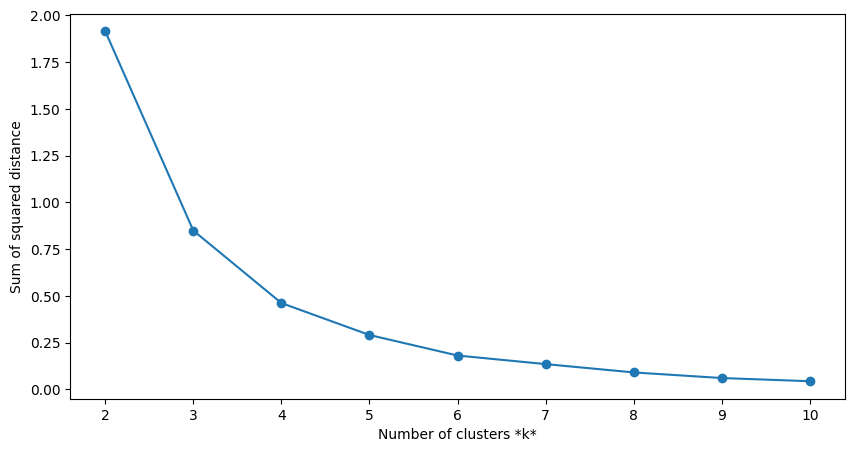

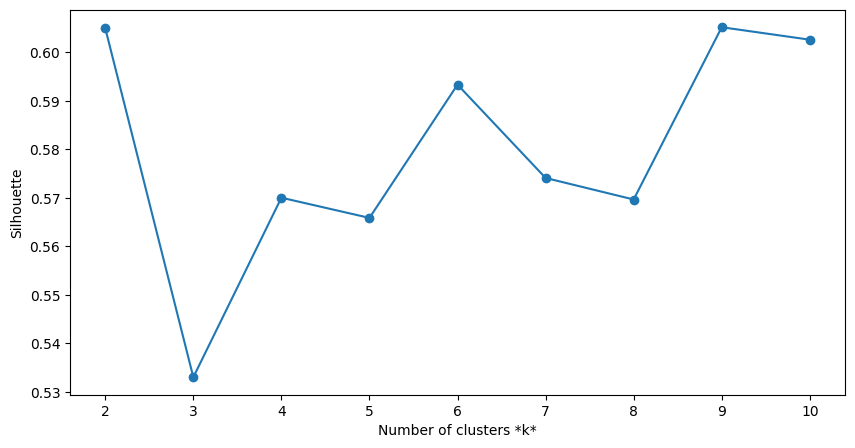

In [ ]:
K = list(range(2,11))
# Plot sse against k
plt.figure(figsize=(10, 5))
plt.plot(K, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# Plot silhouette against k
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette');

### **K-Means**

In [ ]:
kmeans2 = KMeans(n_cluster=3)
kmeans2.fit(cluster2)

####Jarak Terdekat Centroid


In [ ]:
data = cluster2.copy()

# Set the number of clusters
num_clusters = 3

# Initialize KMeans object
Kmeans = Kmeans1(n_clusters=num_clusters)

# Perform the initial fit to get the initial centroids
Kmeans.fit(data)
initial_centroids = Kmeans.cluster_centers_

# Initialize an empty array to store the distances
distances = np.zeros((len(data), num_clusters))

# Calculate the distance between each data point and each centroid
for i in range(len(data)):
    for j in range(num_clusters):
        distances[:, j] = np.linalg.norm(data - initial_centroids[j], axis=1)

    labels = np.argmin(distances, axis=1)

    for j in range(num_clusters):
        initial_centroids[j] = np.mean(data[labels == j], axis=0)

# Display the distances for each data point
print("Jarak setiap data pada iterasi pertama:")
for i in range(len(data)):
    print("Data", i, ":", distances[i,:])

Jarak setiap data pada iterasi pertama:
Data 0 : [0.25818335 0.62732651 0.49525425]
Data 1 : [0.28007777 0.10092136 0.92876405]
Data 2 : [0.23710669 0.59860437 0.4915048 ]
Data 3 : [0.3763266  0.00983948 1.00237195]
Data 4 : [0.68495434 1.00735984 0.11315694]
Data 5 : [0.16497194 0.21435557 0.83525587]
Data 6 : [0.1078269  0.28268399 0.80536749]
Data 7 : [0.10518398 0.44230956 0.6025149 ]
Data 8 : [0.05797573 0.35813374 0.76113734]
Data 9 : [0.14358207 0.24274837 0.83060902]
Data 10 : [0.62252781 0.90805235 0.09113569]
Data 11 : [0.15181284 0.23387498 0.8363741 ]
Data 12 : [0.22809323 0.15405067 0.89056823]
Data 13 : [0.20235424 0.18064907 0.87206398]
Data 14 : [0.16847241 0.21612994 0.84806568]
Data 15 : [0.04611428 0.34703728 0.75182279]
Data 16 : [0.1004561  0.47803726 0.63671595]
Data 17 : [0.18564414 0.55262862 0.54161089]
Data 18 : [1.04868034 1.29268401 0.36961846]
Data 19 : [0.24535957 0.13632765 0.9031304 ]
Data 20 : [0.06523825 0.42915593 0.70778634]
Data 21 : [0.57380482 0.9

In [ ]:
Kmeans.cluster_centers_

array([[0.05542453, 0.52318869],
       [0.00943396, 0.1481702 ],
       [0.63396226, 0.92739446]])

In [ ]:
for i in range(5):
    # Fit the model and get the cluster centroids
    Kmeans.fit(cluster2)
    centroids = Kmeans.cluster_centers_
    
    # Print the centroids
    print("Iteration", i+1)
    print(centroids, "\n", sep="\n")

Iteration 1
[[0.05216426 0.5117407 ]
 [0.63396226 0.92739446]
 [0.0099889  0.13755829]]


Iteration 2
[[0.0099889  0.13755829]
 [0.05216426 0.5117407 ]
 [0.63396226 0.92739446]]


Iteration 3
[[0.05542453 0.52318869]
 [0.00943396 0.1481702 ]
 [0.63396226 0.92739446]]


Iteration 4
[[0.00943396 0.1481702 ]
 [0.63396226 0.92739446]
 [0.05542453 0.52318869]]


Iteration 5
[[0.05542453 0.52318869]
 [0.63396226 0.92739446]
 [0.00943396 0.1481702 ]]




####SSE and Silhoutte

In [ ]:
predicted_kmeans2 = kmeans2.predict(cluster2)
print('Silhouette:', silhouette_score(cluster2, predicted_kmeans2))
print('SSE:', kmeans2.SSE)

Silhouette: 0.5341582204434892
SSE: 0.853105774088605


In [ ]:
frame2 = pd.DataFrame(cluster2)
frame2['cluster'] = predicted_kmeans2
frame2['cluster'].value_counts()

0    17
2    17
1     5
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans2

array([0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1,
       0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **PSO K-Means**

In [ ]:
pso2 = ParticleSwarmOptimizedClustering(n_cluster=3, 
                                       n_particles=20, 
                                       data=cluster2, 
                                       hybrid=True,
                                       max_iter=2000, 
                                       print_debug=200)

In [ ]:
hist = pso2.run()

Initial global best score 0.5197920729335739
Iteration 0001/2000 current gbest score 0.519792072933573879
Iteration 0201/2000 current gbest score 0.519792072933573879
Iteration 0401/2000 current gbest score 0.519792072933573768
Iteration 0601/2000 current gbest score 0.519792072933573768
Iteration 0801/2000 current gbest score 0.519792072933573768
Iteration 1001/2000 current gbest score 0.519792072933573768
Iteration 1201/2000 current gbest score 0.519792072933573768
Iteration 1401/2000 current gbest score 0.519792072933573768
Iteration 1601/2000 current gbest score 0.519792072933573768
Iteration 1801/2000 current gbest score 0.519792072933573768
Finish with gbest score 0.519792072933573768


In [ ]:
pso_kmeans2 = KMeans(n_cluster=3)
pso_kmeans2.centroid = pso2.gbest_centroids.copy()

In [ ]:
predicted_pso2 = pso_kmeans2.predict(cluster2)
print('Silhouette:', silhouette_score(cluster2, predicted_pso2))
print('SSE:', calc_sse(centroids=pso2.gbest_centroids, 
                       data=cluster2, 
                       labels=predicted_pso2))

Silhouette: 0.5508179531668816
SSE: 0.8951517510645483


In [ ]:
frame2 = pd.DataFrame(cluster2)
frame2['cluster'] = predicted_pso2
frame2['cluster'].value_counts()

2    25
0     9
1     5
Name: cluster, dtype: int64

In [ ]:
predicted_pso2

array([0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

###**Pattern Evaluation**

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster2['labels'] = predicted_pso2
data_cluster2['Segment'] = data_cluster2['labels'].map({0: 'First', 1: 'Second', 2: 'Third'})

In [ ]:
data_cluster2[data_cluster2['labels'] == 2].sum()


dbd                                                     10.0
Umur                                              211.211111
labels                                                    50
Segment    ThirdThirdThirdThirdThirdThirdThirdThirdThirdT...
dtype: object

In [ ]:
data_cluster2[data_cluster2['labels'] == 2]

,dbd,Umur,labels,Segment
Binangae (Gowa),0.0,9.666667,2,Third
Bonto-Bonto (Gowa),0.0,6.000000,2,Third
Bontomarannu (Gowa),1.0,13.933333,2,Third
Bontonompo (Gowa),0.0,16.500000,2,Third
Borong (Gowa),0.0,15.000000,2,Third
Gowa (Gowa),0.0,14.666667,2,Third
"Jalan Bangkala, Manggala (Gowa)",0.0,11.666667,2,Third
Jalan Danau Mawang No. 4 (Gowa),0.0,12.666667,2,Third
Jalan Poros Malino (Gowa),0.0,14.000000,2,Third
Palangga (Gowa),0.0,11.000000,2,Third


In [ ]:
data_cluster2

,dbd,Umur,labels,Segment
Bili Bili (Gowa),9.0,28.659933,0,First
Binangae (Gowa),0.0,9.666667,2,Third
Bonto Bontoa (Gowa),10.0,27.333333,0,First
Bonto-Bonto (Gowa),0.0,6.000000,2,Third
Bontomanai (Gowa),29.0,37.869413,1,Second
Bontomarannu (Gowa),1.0,13.933333,2,Third
Bontonompo (Gowa),0.0,16.500000,2,Third
Bontoramba (Gowa),8.0,21.625000,0,First
Bontotangnga (Gowa),0.0,19.333333,0,First
Borong (Gowa),0.0,15.000000,2,Third


In [ ]:
#Order the cluster
data_cluster2['Segment'] = data_cluster2['Segment'].astype('category')
data_cluster2['Segment'] = data_cluster2['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])

In [ ]:
# ==== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ====#
dict_cat = {}
dict_num = {}
for cat in data_cluster2.select_dtypes('object'):
 dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster2.select_dtypes(['int64', 'float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']
# ============ CREATE TABLE FOR EACH CLUSTER ============#
data_cluster2.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster2 = data_cluster2.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T

In [ ]:
data_cluster2['coord'] = coord2

In [ ]:
data_cluster2 = data_cluster2.T
data_percluster2.to_json(r'cluster2_result.json')
data_cluster2.to_json(r'cluster2_df.json')

##**Perbandingan Nilai DBI**

In [ ]:
db_index3 = davies_bouldin_score(cluster2, predicted_kmeans2)
print("DBI kmeans:", db_index3)

db_index4 = davies_bouldin_score(cluster2, predicted_pso2)
print("DBI kmeans with PSO:", db_index4)

DBI kmeans: 0.5822406190667454
DBI kmeans with PSO: 0.529741433913013


#**CLUSTER3**

In [ ]:
data_cluster3 = merge_data[['tifoid','Umur']] 

# Standardize data
scaler = MinMaxScaler()
Num_features = data_cluster3.select_dtypes(include=['int64', 'float64']).columns
scaler.fit(data_cluster3[Num_features])
cluster3 = scaler.transform(data_cluster3[Num_features])

###Elbow Method

In [ ]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(cluster3)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(cluster3, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 11),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
print(df)

    K       sse  silhouette
0   2  1.931668    0.658320
1   3  0.929495    0.517865
2   4  0.467684    0.560446
3   5  0.341691    0.585736
4   6  0.217529    0.585028
5   7  0.127375    0.600282
6   8  0.090909    0.623939
7   9  0.064363    0.646418
8  10  0.049336    0.651152


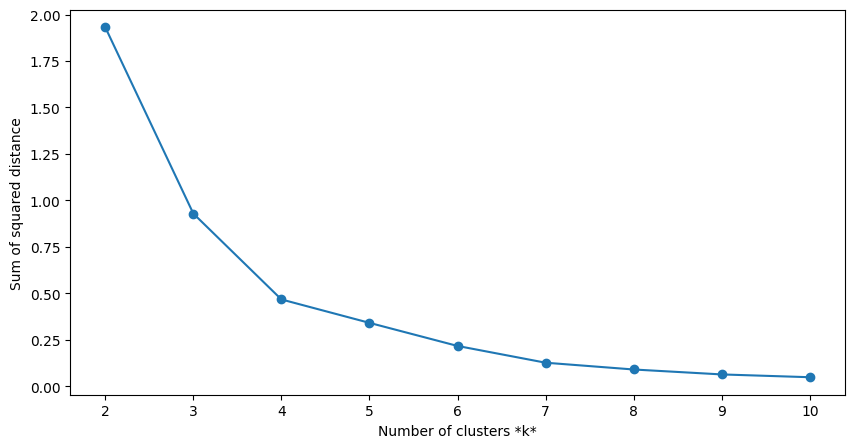

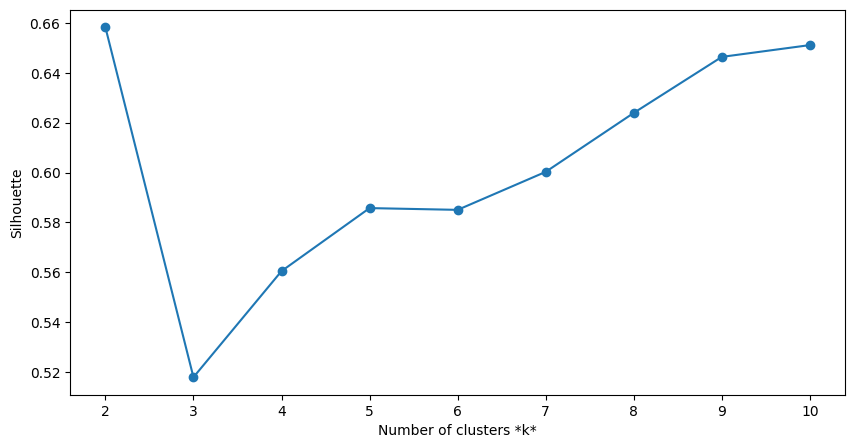

In [ ]:
K = list(range(2,11))
# Plot sse against k
plt.figure(figsize=(10, 5))
plt.plot(K, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# Plot silhouette against k
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette');

### **K-Means**

In [ ]:
kmeans3 = KMeans(n_cluster=3)
kmeans3.fit(cluster3)

####Jarak Terdekat Centroid


In [ ]:
data = cluster3.copy()

# Set the number of clusters
num_clusters = 3

# Initialize KMeans object
Kmeans = Kmeans1(n_clusters=num_clusters)

# Perform the initial fit to get the initial centroids
Kmeans.fit(data)
initial_centroids = Kmeans.cluster_centers_

# Initialize an empty array to store the distances
distances = np.zeros((len(data), num_clusters))

# Calculate the distance between each data point and each centroid
for i in range(len(data)):
    for j in range(num_clusters):
        distances[:, j] = np.linalg.norm(data - initial_centroids[j], axis=1)

    labels = np.argmin(distances, axis=1)

    for j in range(num_clusters):
        initial_centroids[j] = np.mean(data[labels == j], axis=0)

# Display the distances for each data point
print("Jarak setiap data pada iterasi pertama:")
for i in range(len(data)):
    print("Data", i, ":", distances[i,:])

Jarak setiap data pada iterasi pertama:
Data 0 : [0.65598602 0.56766295 0.28933565]
Data 1 : [0.10090518 1.04913989 0.28758874]
Data 2 : [0.57301106 0.77297964 0.19841453]
Data 3 : [0.00967211 1.11482795 0.38194952]
Data 4 : [1.30659145 0.21277115 1.03120722]
Data 5 : [0.21594193 0.94943341 0.16805474]
Data 6 : [0.28267822 0.92597081 0.11428539]
Data 7 : [0.44147814 0.74473338 0.07645957]
Data 8 : [0.35812918 0.90411388 0.08732074]
Data 9 : [0.24274164 0.96332922 0.15773249]
Data 10 : [0.97481652 0.13813618 0.68310706]
Data 11 : [0.233868   0.96830444 0.16525999]
Data 12 : [0.15404007 1.01548197 0.23725566]
Data 13 : [0.18064003 0.99929346 0.2126287 ]
Data 14 : [0.21612238 0.97842079 0.18068392]
Data 15 : [0.34703258 0.89309001 0.07277726]
Data 16 : [0.48851578 0.736812   0.10781424]
Data 17 : [0.61541666 0.54354374 0.27902913]
Data 18 : [1.20977649 0.10264218 0.92341936]
Data 19 : [0.13631567 1.02651662 0.25389967]
Data 20 : [0.42915212 0.87328143 0.10126821]
Data 21 : [1.18741309 0.0

In [ ]:
Kmeans.cluster_centers_

array([[0.00925926, 0.1481702 ],
       [0.8       , 0.92739446],
       [0.08564815, 0.52318869]])

In [ ]:
for i in range(1,5):
    # Fit the model and get the cluster centroids
    Kmeans.fit(cluster3)
    centroids = Kmeans.cluster_centers_
    
    # Print the centroids
    print("Iteration", i+1)
    print(centroids, "\n", sep="\n")

Iteration 2
[[0.08564815 0.52318869]
 [0.00925926 0.1481702 ]
 [0.8        0.92739446]]


Iteration 3
[[0.08564815 0.52318869]
 [0.8        0.92739446]
 [0.00925926 0.1481702 ]]


Iteration 4
[[0.08564815 0.52318869]
 [0.8        0.92739446]
 [0.00925926 0.1481702 ]]


Iteration 5
[[0.08564815 0.52318869]
 [0.8        0.92739446]
 [0.00925926 0.1481702 ]]




####SSE and Silhoute

In [ ]:
predicted_kmeans3 = kmeans3.predict(cluster3)
print('Silhouette:', silhouette_score(cluster3, predicted_kmeans3))
print('SSE:', kmeans3.SSE)

Silhouette: 0.5217472179922131
SSE: 0.9381690132298144


In [ ]:
frame1 = pd.DataFrame(cluster1)
frame1['cluster'] = predicted_kmeans1
frame1['cluster'].value_counts()

2    18
0    16
1     5
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans1

array([0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **PSO K-Means**

In [ ]:
pso3 = ParticleSwarmOptimizedClustering(n_cluster=3, 
                                       n_particles=10, 
                                       data=cluster3, 
                                       hybrid=True,
                                       max_iter=2000, 
                                       print_debug=100)

In [ ]:
hist3 = pso3.run()

Initial global best score 0.5763259408830909
Iteration 0001/2000 current gbest score 0.576325940883090859
Iteration 0101/2000 current gbest score 0.548384340094017375
Iteration 0201/2000 current gbest score 0.546490556404645944
Iteration 0301/2000 current gbest score 0.546489935098782298
Iteration 0401/2000 current gbest score 0.546489933246887105
Iteration 0501/2000 current gbest score 0.546489933198143096
Iteration 0601/2000 current gbest score 0.546489933197946587
Iteration 0701/2000 current gbest score 0.546489933196085631
Iteration 0801/2000 current gbest score 0.546489933195981270
Iteration 0901/2000 current gbest score 0.546489933195630884
Iteration 1001/2000 current gbest score 0.546489933195630884
Iteration 1101/2000 current gbest score 0.546489933195630884
Iteration 1201/2000 current gbest score 0.546489933195630884
Iteration 1301/2000 current gbest score 0.546489933195630884
Iteration 1401/2000 current gbest score 0.546489933195630884
Iteration 1501/2000 current gbest score 

In [ ]:
pso_kmeans3 = KMeans(n_cluster=3)
pso_kmeans3.centroid = pso3.gbest_centroids.copy()

In [ ]:
predicted_pso3 = pso_kmeans3.predict(cluster3)
print('Silhouette:', silhouette_score(cluster3, predicted_pso3))
print('SSE:', calc_sse(centroids=pso3.gbest_centroids, 
                       data=cluster3, 
                       labels=predicted_pso3))

Silhouette: 0.49124701897928913
SSE: 1.156503845037275


In [ ]:
frame1 = pd.DataFrame(cluster1)
frame1['cluster'] = predicted_pso1
frame1['cluster'].value_counts()

0    25
1    11
2     3
Name: cluster, dtype: int64

In [ ]:
predicted_pso1

array([1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### **Pattern Evaluation**

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster3['labels'] = predicted_pso3
data_cluster3['Segment'] = data_cluster3['labels'].map({0: 'First', 1: 'Second', 2: 'Third'})

In [ ]:
data_cluster3[data_cluster3['labels'] == 0].sum()


tifoid                         216.0
Umur                      175.720426
labels                             0
Segment    FirstFirstFirstFirstFirst
dtype: object

In [ ]:
data_cluster3[data_cluster3['labels'] == 0]

,tifoid,Umur,labels,Segment
Bontomanai (Gowa),54.0,37.869413,0,First
Borongloe (Gowa),37.0,32.261089,0,First
Pakatto (Gowa),48.0,37.070597,0,First
Romang Lompoa (Gowa),46.0,37.299720,0,First
Sokkolia (Gowa),31.0,31.219608,0,First


In [ ]:
data_cluster3[data_cluster3['labels'] == 1].sum()


tifoid                                                  74.0
Umur                                              384.881902
labels                                                    22
Segment    SecondSecondSecondSecondSecondSecondSecondSeco...
dtype: object

In [ ]:
data_cluster3[data_cluster3['labels'] == 1]

,tifoid,Umur,labels,Segment
Bili Bili (Gowa),14.0,28.659933,1,Second
Binangae (Gowa),0.0,9.666667,1,Second
Bonto Bontoa (Gowa),3.0,27.333333,1,Second
Bontomarannu (Gowa),2.0,13.933333,1,Second
Bontonompo (Gowa),1.0,16.500000,1,Second
Bontoramba (Gowa),8.0,21.625000,1,Second
Bontotangnga (Gowa),0.0,19.333333,1,Second
Borong (Gowa),0.0,15.000000,1,Second
Gowa (Gowa),0.0,14.666667,1,Second
"Jalan Bangkala, Manggala (Gowa)",0.0,11.666667,1,Second


In [ ]:
data_cluster3[data_cluster3['labels'] == 2].sum()


tifoid                                                   9.0
Umur                                               40.777778
labels                                                    24
Segment    ThirdThirdThirdThirdThirdThirdThirdThirdThirdT...
dtype: object

In [ ]:
data_cluster3[data_cluster3['labels'] == 2]

,tifoid,Umur,labels,Segment
Bonto-Bonto (Gowa),0.0,6.000000,2,Third
Borong Sapiri (Gowa),0.0,5.666667,2,Third
Lempangang (Gowa),0.0,7.666667,2,Third
Moncongloe (Gowa),0.0,5.444444,2,Third
Sungguminasa (Gowa),1.0,7.000000,2,Third
Tangkebajeng (Gowa),2.0,7.000000,2,Third
Buntu Alang (Gowa),1.0,0.333333,2,Third
Lauwa (Gowa),1.0,0.333333,2,Third
Pallantikang (Gowa),1.0,0.333333,2,Third
Panambungan (Gowa),1.0,0.333333,2,Third


In [ ]:
data_cluster3

,tifoid,Umur,labels,Segment
Bili Bili (Gowa),14.0,28.659933,1,Second
Binangae (Gowa),0.0,9.666667,1,Second
Bonto Bontoa (Gowa),3.0,27.333333,1,Second
Bonto-Bonto (Gowa),0.0,6.000000,2,Third
Bontomanai (Gowa),54.0,37.869413,0,First
Bontomarannu (Gowa),2.0,13.933333,1,Second
Bontonompo (Gowa),1.0,16.500000,1,Second
Bontoramba (Gowa),8.0,21.625000,1,Second
Bontotangnga (Gowa),0.0,19.333333,1,Second
Borong (Gowa),0.0,15.000000,1,Second


In [ ]:
#Order the cluster
data_cluster3['Segment'] = data_cluster3['Segment'].astype('category')
data_cluster3['Segment'] = data_cluster3['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])

In [ ]:
# ==== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ====#
dict_cat = {}
dict_num = {}
for cat in data_cluster3.select_dtypes('object'):
 dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster3.select_dtypes(['int64', 'float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']
# ============ CREATE TABLE FOR EACH CLUSTER ============#
data_cluster3.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster3 = data_cluster3.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T

In [ ]:
data_cluster3['coord'] = coord3

In [ ]:
data_cluster3 = data_cluster3.T
data_percluster3.to_json(r'cluster3_result.json')
data_cluster3.to_json(r'cluster3_df.json')

##**Perbandingan Nilai DBI**

In [ ]:
db_index5 = davies_bouldin_score(cluster3, predicted_kmeans3)
print("DBI kmeans:", db_index5)

db_index6 = davies_bouldin_score(cluster3, predicted_pso3)
print("DBI kmeans with PSO:", db_index6)

DBI kmeans: 0.5996568343593284
DBI kmeans with PSO: 0.5643803250510376


#**CLUSTER4**

In [ ]:
data_cluster4 = merge_data[['Tersedia air bersih', 
                       'Ada lalat/nyamuk di sekitar tumpukan sampah',
                       'Ada ventilasi disemua ruangan']]

# Standardize data
scaler = MinMaxScaler()
Num_features = data_cluster4.select_dtypes(include=['int64', 'float64']).columns
scaler.fit(data_cluster4[Num_features])
cluster4 = scaler.transform(data_cluster4[Num_features])

###Elbow Method

In [ ]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(cluster4)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(cluster4, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 11),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
print(df)

    K       sse  silhouette
0   2  1.180882    0.842564
1   3  0.691205    0.738468
2   4  0.341623    0.735576
3   5  0.214514    0.739827
4   6  0.140297    0.729447
5   7  0.106125    0.706129
6   8  0.080283    0.692837
7   9  0.050388    0.694326
8  10  0.031544    0.684031


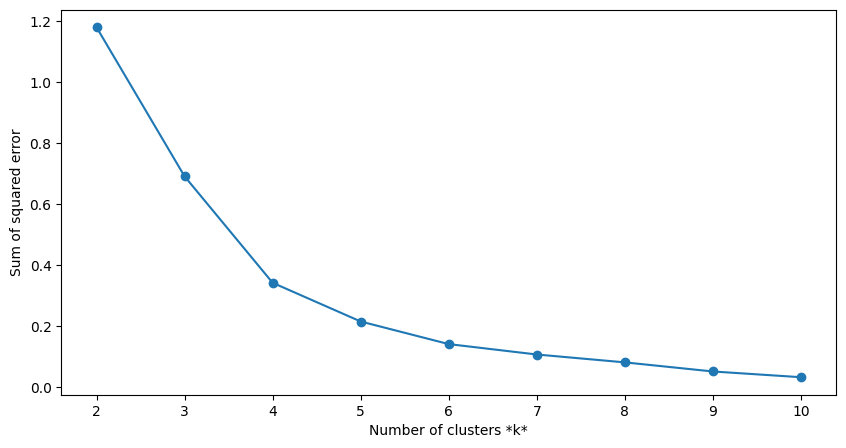

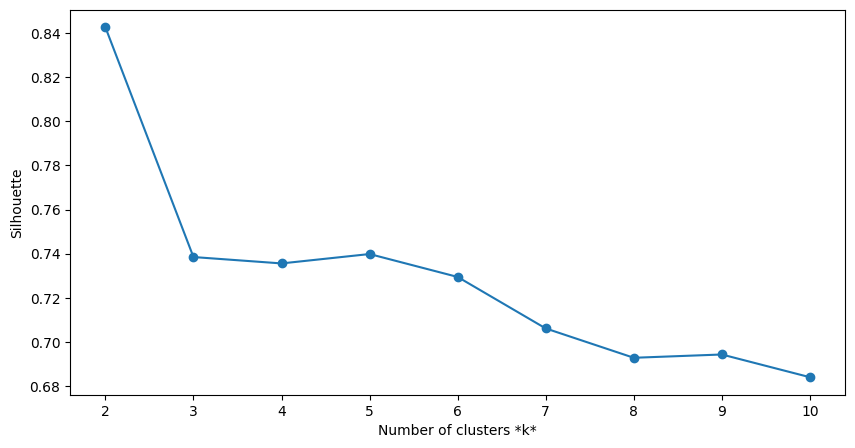

In [ ]:
K = list(range(2,11))
# Plot sse against k
plt.figure(figsize=(10, 5))
plt.plot(K, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared error');

# Plot silhouette against k
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette');

### **K-Means**

In [ ]:
kmeans4 = KMeans(n_cluster=4)
kmeans4.fit(cluster4)

####Jarak Terdekat Centroid


In [ ]:
data = cluster4.copy()

# Set the number of clusters
num_clusters = 4

# Initialize KMeans object
Kmeans = Kmeans1(n_clusters=num_clusters)

# Perform the initial fit to get the initial centroids
Kmeans.fit(data)
initial_centroids = Kmeans.cluster_centers_

# Initialize an empty array to store the distances
distances = np.zeros((len(data), num_clusters))

# Calculate the distance between each data point and each centroid
for i in range(len(data)):
    for j in range(num_clusters):
        distances[:, j] = np.linalg.norm(data - initial_centroids[j], axis=1)

    labels = np.argmin(distances, axis=1)

    for j in range(num_clusters):
        initial_centroids[j] = np.mean(data[labels == j], axis=0)

# Display the distances for each data point
print("Jarak setiap data pada iterasi pertama:")
for i in range(len(data)):
    print("Data", i, ":", distances[i,:])

Jarak setiap data pada iterasi pertama:
Data 0 : [1.22903836 0.35484575 0.69514132 0.0233497 ]
Data 1 : [1.59256555 0.01916423 1.0613874  0.35255451]
Data 2 : [1.31835523 0.33630372 0.81666974 0.25575045]
Data 3 : [1.60049933 0.02436688 1.07004472 0.36164549]
Data 4 : [0.12796399 1.44984562 0.41235673 1.11607747]
Data 5 : [1.53216462 0.07036234 0.99853017 0.2889249 ]
Data 6 : [1.58420168 0.01839285 1.05310963 0.34417376]
Data 7 : [1.31447905 0.26512632 0.78363593 0.08804976]
Data 8 : [1.60049933 0.02436688 1.07004472 0.36164549]
Data 9 : [1.60049933 0.02436688 1.07004472 0.36164549]
Data 10 : [0.34719213 1.25599242 0.21183373 0.91893473]
Data 11 : [1.60469332 0.02767238 1.07419965 0.36587504]
Data 12 : [1.59256555 0.01916423 1.0613874  0.35255451]
Data 13 : [1.59256555 0.01916423 1.0613874  0.35255451]
Data 14 : [1.60049933 0.02436688 1.07004472 0.36164549]
Data 15 : [1.47237631 0.15251875 0.95293649 0.27674774]
Data 16 : [1.4922974  0.11920748 0.95783452 0.2505477 ]
Data 17 : [1.25287

In [ ]:
Kmeans.cluster_centers_

array([[0.93115942, 0.91666667, 0.93150685],
       [0.01549225, 0.01724138, 0.01511573],
       [0.61835749, 0.55555556, 0.6803653 ],
       [0.21594203, 0.16666667, 0.24383562]])

In [ ]:
for i in range(1,5):
    # Fit the model and get the cluster centroids
    Kmeans.fit(cluster4)
    centroids = Kmeans.cluster_centers_
    
    # Print the centroids
    print("Iteration", i+1)
    print(centroids, "\n", sep="\n")

Iteration 2
[[0.21594203 0.16666667 0.24383562]
 [0.01549225 0.01724138 0.01511573]
 [0.61835749 0.55555556 0.6803653 ]
 [0.93115942 0.91666667 0.93150685]]


Iteration 3
[[0.21594203 0.16666667 0.24383562]
 [0.61835749 0.55555556 0.6803653 ]
 [0.01549225 0.01724138 0.01511573]
 [0.93115942 0.91666667 0.93150685]]


Iteration 4
[[0.61835749 0.55555556 0.6803653 ]
 [0.01549225 0.01724138 0.01511573]
 [0.21594203 0.16666667 0.24383562]
 [0.93115942 0.91666667 0.93150685]]


Iteration 5
[[0.61835749 0.55555556 0.6803653 ]
 [0.01549225 0.01724138 0.01511573]
 [0.93115942 0.91666667 0.93150685]
 [0.21594203 0.16666667 0.24383562]]




####SSE and Silhoute

In [ ]:
predicted_kmeans4 = kmeans4.predict(cluster4)
print('Silhouette:', silhouette_score(cluster4, predicted_kmeans4))
print('SSE:', kmeans4.SSE)

Silhouette: 0.7412668949649509
SSE: 0.5640964895690705


In [ ]:
frame4 = pd.DataFrame(cluster4)
frame4['cluster'] = predicted_kmeans4
frame4['cluster'].value_counts()

2    26
1     5
3     4
0     4
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans4

array([3, 2, 0, 2, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 0, 2, 3, 1, 2, 0, 1,
       3, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **PSO K-Means**

In [ ]:
pso4 = ParticleSwarmOptimizedClustering(n_cluster=4, 
                                       n_particles=10, 
                                       data=cluster4, 
                                       hybrid=True,
                                       max_iter=2000, 
                                       print_debug=100)

In [ ]:
hist4 = pso4.run()

Initial global best score 0.36741651861840097
Iteration 0001/2000 current gbest score 0.367416518618400967
Iteration 0101/2000 current gbest score 0.289030114590469511
Iteration 0201/2000 current gbest score 0.286118580105099662
Iteration 0301/2000 current gbest score 0.286114982987358435
Iteration 0401/2000 current gbest score 0.286114466654428634
Iteration 0501/2000 current gbest score 0.286114368951489451
Iteration 0601/2000 current gbest score 0.286114347892167664
Iteration 0701/2000 current gbest score 0.286114345397071368
Iteration 0801/2000 current gbest score 0.286114345175717932
Iteration 0901/2000 current gbest score 0.286114345126913694
Iteration 1001/2000 current gbest score 0.286114345113630486
Iteration 1101/2000 current gbest score 0.286114345105899004
Iteration 1201/2000 current gbest score 0.286114345104472090
Iteration 1301/2000 current gbest score 0.286114345104039325
Iteration 1401/2000 current gbest score 0.286114345103915368
Iteration 1501/2000 current gbest score

In [ ]:
pso_kmeans4 = KMeans(n_cluster=4)
pso_kmeans4.centroid = pso4.gbest_centroids.copy()

In [ ]:
predicted_pso4 = pso_kmeans4.predict(cluster4)
print('Silhouette:', silhouette_score(cluster4, predicted_pso4))
print('SSE:', calc_sse(centroids=pso4.gbest_centroids, 
                       data=cluster4, 
                       labels=predicted_pso4))

Silhouette: 0.7416692513509283
SSE: 0.37473658885825223


In [ ]:
frame4 = pd.DataFrame(cluster4)
frame4['cluster'] = predicted_pso4
frame4['cluster'].value_counts()

1    29
0     5
2     3
3     2
Name: cluster, dtype: int64

In [ ]:
predicted_pso4

array([0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 3,
       0, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

###**Pattern Evaluation**

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster4['labels'] = predicted_pso4
data_cluster4['Segment'] = data_cluster4['labels'].map({0: 'First', 1: 'Second', 2: 'Third', 3: 'Fourth'})

In [ ]:
#Order the cluster
data_cluster4['Segment'] = data_cluster4['Segment'].astype('category')
data_cluster4['Segment'] = data_cluster4['Segment'].cat.reorder_categories(['First', 'Second', 'Third', 'Fourth'])

In [ ]:
# ==== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ====#
dict_cat = {}
dict_num = {}
for cat in data_cluster4.select_dtypes('object'):
 dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster4.select_dtypes(['int64', 'float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']
# ============ CREATE TABLE FOR EACH CLUSTER ============#
data_cluster4.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster4 = data_cluster4.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T

In [ ]:
data_cluster4['coord'] = coord4

In [ ]:
data_cluster4 = data_cluster4.T
data_percluster4.to_json(r'cluster4_result.json')
data_cluster4.to_json(r'cluster4_df.json')

##**Perbandingan Nilai DBI**

In [ ]:
db_index7 = davies_bouldin_score(cluster4, predicted_kmeans4)
print("DBI kmeans:", db_index7)

db_index8 = davies_bouldin_score(cluster4, predicted_pso4)
print("DBI kmeans with PSO:", db_index8)

DBI kmeans: 0.503481400306679
DBI kmeans with PSO: 0.4694611682632531


#**CLUSTER 5**

In [ ]:
data_cluster5 = merge_data[['Nafsu Makan Kurang',
                            'Sering Jajan Diluar',
                            'Sering Pakai Jamban/Toilet']] 

# Standardize data
scaler = MinMaxScaler()
Num_features = data_cluster5.select_dtypes(include=['int64', 'float64']).columns
scaler.fit(data_cluster5[Num_features])
cluster5 = scaler.transform(data_cluster5[Num_features])

###Elbow Method

In [ ]:
sse = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = Kmeans1(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(cluster5)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(cluster5, labels)
    silhouette_scores.append(silhouette_avg)

table_elbow = {
    'K': range(2, 11),
    'sse': sse,
    'silhouette': silhouette_scores
}
df = pd.DataFrame(table_elbow)
print(df)

    K       sse  silhouette
0   2  1.056586    0.861212
1   3  0.522329    0.793298
2   4  0.209714    0.789620
3   5  0.120669    0.793350
4   6  0.059387    0.778083
5   7  0.036406    0.760120
6   8  0.024433    0.738794
7   9  0.017342    0.598175
8  10  0.010354    0.595479


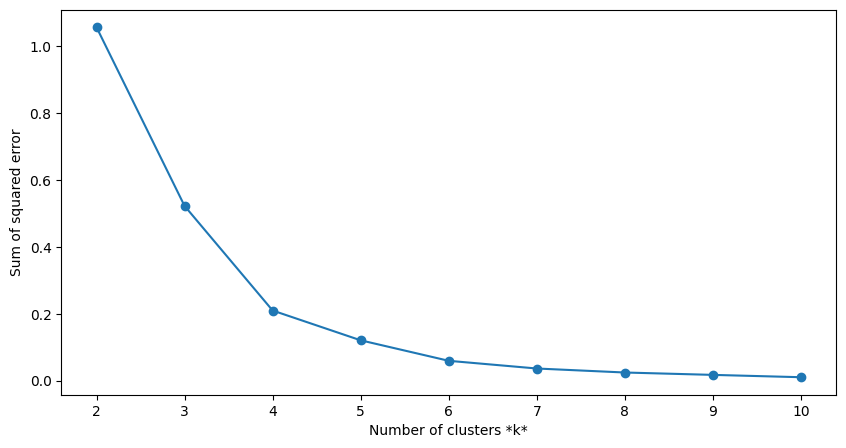

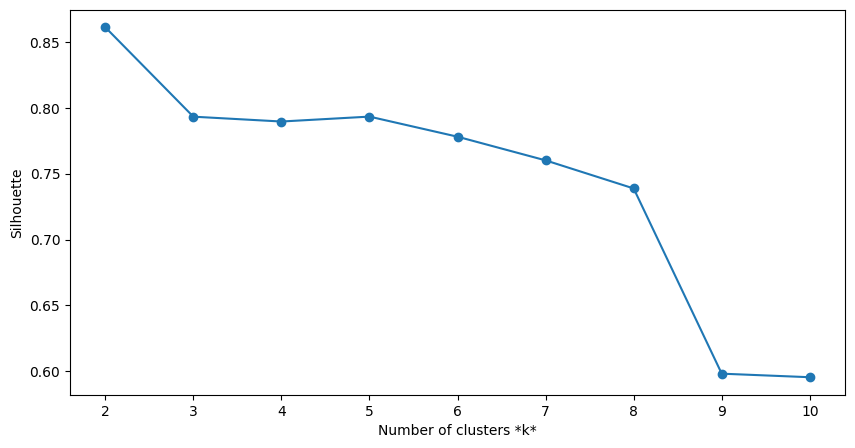

In [ ]:
K = list(range(2,11))
# Plot sse against k
plt.figure(figsize=(10, 5))
plt.plot(K, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared error');

# Plot silhouette against k
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Silhouette');

### **K-Means**

In [ ]:
kmeans5 = KMeans(n_cluster=3)
kmeans5.fit(cluster5)

####Jarak Terdekat Centroid


In [ ]:
data = cluster5.copy()

# Set the number of clusters
num_clusters = 3

# Initialize KMeans object
Kmeans = Kmeans1(n_clusters=num_clusters)

# Perform the initial fit to get the initial centroids
Kmeans.fit(data)
initial_centroids = Kmeans.cluster_centers_

# Initialize an empty array to store the distances
distances = np.zeros((len(data), num_clusters))

# Calculate the distance between each data point and each centroid
for i in range(len(data)):
    for j in range(num_clusters):
        distances[:, j] = np.linalg.norm(data - initial_centroids[j], axis=1)

    labels = np.argmin(distances, axis=1)

    for j in range(num_clusters):
        initial_centroids[j] = np.mean(data[labels == j], axis=0)

# Display the distances for each data point
print("Jarak setiap data pada iterasi pertama:")
for i in range(len(data)):
    print("Data", i, ":", distances[i,:])

Jarak setiap data pada iterasi pertama:
Data 0 : [0.35314072 0.91642393 0.03986418]
Data 1 : [0.02243583 1.28994947 0.41043445]
Data 2 : [0.18193824 1.08872389 0.21085601]
Data 3 : [0.02243583 1.28994947 0.41043445]
Data 4 : [1.444379   0.18875558 1.05566742]
Data 5 : [0.0672123  1.20351661 0.32437073]
Data 6 : [0.01203994 1.2760956  0.3964883 ]
Data 7 : [0.23284375 1.03774798 0.16094916]
Data 8 : [0.02305358 1.29081043 0.41111297]
Data 9 : [0.02305358 1.29081043 0.41111297]
Data 10 : [1.23502318 0.04133481 0.8459786 ]
Data 11 : [0.02305358 1.29081043 0.41111297]
Data 12 : [0.02243583 1.28994947 0.41043445]
Data 13 : [0.02305358 1.29081043 0.41111297]
Data 14 : [0.02305358 1.29081043 0.41111297]
Data 15 : [0.02494591 1.24495231 0.3653867 ]
Data 16 : [0.14694229 1.12214795 0.24285195]
Data 17 : [0.5156941  0.7538965  0.12777399]
Data 18 : [1.70481718 0.4368615  1.31596084]
Data 19 : [0.01635226 1.28475534 0.40515111]
Data 20 : [0.00984764 1.25966901 0.38000857]
Data 21 : [1.02896654 0.2

In [ ]:
for i in range(5):
    # Fit the model and get the cluster centroids
    Kmeans.fit(cluster5)
    centroids = Kmeans.cluster_centers_
    
    # Print the centroids
    print("Iteration", i+1)
    print(centroids, "\n", sep="\n")

Iteration 1
[[0.01783626 0.0177305  0.01161616]
 [0.76666667 0.73829787 0.73939394]
 [0.25       0.23404255 0.23674242]]


Iteration 2
[[0.01783626 0.0177305  0.01161616]
 [0.76666667 0.73829787 0.73939394]
 [0.25       0.23404255 0.23674242]]


Iteration 3
[[0.01783626 0.0177305  0.01161616]
 [0.76666667 0.73829787 0.73939394]
 [0.25       0.23404255 0.23674242]]


Iteration 4
[[0.01783626 0.0177305  0.01161616]
 [0.76666667 0.73829787 0.73939394]
 [0.25       0.23404255 0.23674242]]


Iteration 5
[[0.01783626 0.0177305  0.01161616]
 [0.76666667 0.73829787 0.73939394]
 [0.25       0.23404255 0.23674242]]




####SSE and Silhoute

In [ ]:
predicted_kmeans5 = kmeans5.predict(cluster5)
print('Silhouette:', silhouette_score(cluster5, predicted_kmeans5))
print('SSE:', kmeans5.SSE)

Silhouette: 0.7932049113399259
SSE: 0.4332845230992879


In [ ]:
frame5 = pd.DataFrame(cluster5)
frame5['cluster'] = predicted_kmeans5
frame5['cluster'].value_counts()

2    29
0     5
1     5
Name: cluster, dtype: int64

In [ ]:
predicted_kmeans5

array([0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### **PSO K-Means**

In [ ]:
pso5 = ParticleSwarmOptimizedClustering(n_cluster=3, 
                                       n_particles=10, 
                                       data=cluster5, 
                                       hybrid=True,
                                       max_iter=2000, 
                                       print_debug=200)

In [ ]:
hist5 = pso5.run()

Initial global best score 0.3713642276406366
Iteration 0001/2000 current gbest score 0.371364227640636591
Iteration 0201/2000 current gbest score 0.361750116679776135
Iteration 0401/2000 current gbest score 0.361721091768783143
Iteration 0601/2000 current gbest score 0.361721071692509888
Iteration 0801/2000 current gbest score 0.361721071639951541
Iteration 1001/2000 current gbest score 0.361721066495341415
Iteration 1201/2000 current gbest score 0.361721065103664197
Iteration 1401/2000 current gbest score 0.361721064914946933
Iteration 1601/2000 current gbest score 0.361721064908536505
Iteration 1801/2000 current gbest score 0.361721064907074286
Finish with gbest score 0.361721064906791179


In [ ]:
pso_kmeans5 = KMeans(n_cluster=3)
pso_kmeans5.centroid = pso5.gbest_centroids.copy()

In [ ]:
predicted_pso5 = pso_kmeans5.predict(cluster5)
print('Silhouette:', silhouette_score(cluster5, predicted_pso5))
print('SSE:', calc_sse(centroids=pso5.gbest_centroids, 
                       data=cluster5, 
                       labels=predicted_pso5))

Silhouette: 0.7931353732920494
SSE: 0.5336950834657452


In [ ]:
frame5 = pd.DataFrame(cluster5)
frame5['cluster'] = predicted_pso5
frame5['cluster'].value_counts()

1    28
2     6
0     5
Name: cluster, dtype: int64

In [ ]:
predicted_pso5

array([0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

###**Pattern Evaluation**

In [ ]:
#create new column for cluster labels associated with each subject
data_cluster5['labels'] = predicted_pso5
data_cluster5['Segment'] = data_cluster5['labels'].map({0: 'First', 1: 'Second', 2: 'Third'})

In [ ]:
#Order the cluster
data_cluster5['Segment'] = data_cluster5['Segment'].astype('category')
data_cluster5['Segment'] = data_cluster5['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])


In [ ]:
# ==== CREATE DICTIONARY FOR OBJECT AND NUMERICAL COLUMNS ====#
dict_cat = {}
dict_num = {}
for cat in data_cluster5.select_dtypes('object'):
 dict_cat[cat] = lambda x: x.value_counts().index[0]
for num in data_cluster5.select_dtypes(['int64', 'float64']):
  if (num == 'Total'):
    continue
  dict_num[num] = ['mean']
# ============ CREATE TABLE FOR EACH CLUSTER ============#
data_cluster5.rename(columns={'labels': 'Total'}, inplace=True)
data_percluster5 = data_cluster5.groupby('Segment').agg({
 'Total': 'count',
 **dict_num,
 **dict_cat
}).T

In [ ]:
data_cluster5['coord'] = coord5

In [ ]:
data_cluster5 = data_cluster5.T
data_percluster5.to_json(r'cluster5_result.json')
data_cluster5.to_json(r'cluster5_df.json')

##**Perbandingan Nilai DBI**

In [ ]:
db_index9 = davies_bouldin_score(cluster5, predicted_kmeans5)
print("DBI kmeans:", db_index9)

db_index10 = davies_bouldin_score(cluster5, predicted_pso5)
print("DBI kmeans with PSO:", db_index10)

DBI kmeans: 0.3985965997249397
DBI kmeans with PSO: 0.33301278884485613
